## 这些课的内容

1. 了解什么是提示工程
2. 掌握常见的提示工程方法
3. 实际应用案例


### 提示工程为什么这么重要
我们需要给AI下发命令，让AI去完成，只有提出了具体的要求，AI才知道如何去完成。 

好的Prompt需要不断调优。

- 说清楚自己到底想要什么，要具体！
- 不要让机器去猜测太多。为了不让机器去猜测，我们就需要告诉细节。 
- 提示工程有一些技巧，灵活掌握，事半功倍。 

### 提示词构成
- **指示（Instruction）:** 描述要让它做什么？
- **上下文（Context）:** 给出与任务相关的背景信息
- **例子（Examples）:** ，给出一些例子，让模型知道怎么回复
- **输入（Input）:** 任务的输入信息
- **输出（Output Format）:** 输出的格式，想要什么形式的输出？

In [85]:
# 加载环境变量
import os
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

# .env 存储api_key
load_dotenv()
client = OpenAI()

In [69]:

model = "gpt-4-1106-preview"

def generate_responses(prompt, model="gpt-4"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            #{"role": "system", "content": "You are a helpful assistant who provides information to users."},
            {"role": "user", "content": prompt},
        ],
        temperature=0.7,
        #max_tokens=128,
    )

    return response.choices[0].message.content

###  1. 定义清楚提示词

In [86]:
prompt = f"""
根据下面的上下文回答问题。保持答案简短且准确。如果不确定答案，请回答“不确定答案”。

Teplizumab起源于一个位于新泽西的药品公司，名为Ortho Pharmaceutical。\
在那里，科学家们生成了一种早期版本的抗体，被称为OKT3。最初这种分子是从小鼠中提取的，\
能够结合到T细胞的表面，并限制它们的细胞杀伤潜力。在1986年，它被批准用于帮助预防肾脏移植后的\
器官排斥，成为首个被允许用于人类的治疗性抗体。


问题：OKT3最初是从什么来源提取的？

"""
response = generate_responses(prompt)
print(response)

OKT3最初是从小鼠中提取的。


In [87]:
# 定义结构，定义变量

instruction = """
根据下面的上下文回答问题。保持答案简短且准确。如果不确定答案，请回答“不确定答案”。
"""

context = """
Teplizumab起源于一个位于新泽西的药品公司，名为Ortho Pharmaceutical。\
在那里，科学家们生成了一种早期版本的抗体，被称为OKT3。最初这种分子是从小鼠中提取的，\
能够结合到T细胞的表面，并限制它们的细胞杀伤潜力。在1986年，它被批准用于帮助预防肾脏移植后的\
器官排斥，成为首个被允许用于人类的治疗性抗体。
"""

query = """
OKT3最初是从什么来源提取的？
"""

prompt = f"""
{instruction}

### 上下文 
{context}

### 问题：
{query}

"""
response = generate_responses(prompt)
print(response)

OKT3最初是从小鼠中提取的。


In [88]:
# 添加格式

instruction = """
根据下面的上下文回答问题。保持答案简短且准确。如果不确定答案，请回答“不确定答案”。

以Json格式输出:
{"具体问题":"答案"}, 
"""

context = """
Teplizumab起源于一个位于新泽西的药品公司，名为Ortho Pharmaceutical。\
在那里，科学家们生成了一种早期版本的抗体，被称为OKT3。最初这种分子是从小鼠中提取的，\
能够结合到T细胞的表面，并限制它们的细胞杀伤潜力。在1986年，它被批准用于帮助预防肾脏移植后的\
器官排斥，成为首个被允许用于人类的治疗性抗体。
"""

query = """
OKT3最初是从什么来源提取的？
"""

prompt = f"""
{instruction}

### 上下文 
{context}

### 问题：
{query}

"""
response = generate_responses(prompt)
print(response)

{"OKT3最初是从什么来源提取的？":"小鼠"}


###  2. Few-shot learning

```one-shot learning```: 只给一个example

```few-shot learning```: 多个examples

```zero-shot learning```: 不给任何的examples

In [ ]:
# example 1  reference: from https://www.promptingguide.ai/
prompt = """
Classify the text into neutral, negative or positive. 
Text: I think the vacation is okay.
Sentiment: 
"""
response = generate_responses(prompt)
print(response)

In [ ]:
# example 1
prompt = """
Classify the text into neutral, negative or positive. 

# Examples
Text: I think the vacation is okay. Sentiment: neutral
Text: I don't like the computer. Sentiment: negative

Text: This book is awesome! Sentiment:
"""
response = generate_responses(prompt)
print(response)

例子：

电影评分： 1，2，3，4，5
张三：
5:好的
3，4: 一般吧（中性）
1，2（差）
李四：
4，5:好的
3:中性
1，2差

In [ ]:
# example 2 reference: from https://www.promptingguide.ai/
prompt = """
Classify the text into neutral, negative or positive. 


Text: The book is not bad. Sentiment:
"""
response = generate_responses(prompt)
print(response)

In [ ]:
# example 2
prompt = """
Classify the text into neutral, negative or positive. 

# Examples
Text: I think the vacation is okay. Sentiment: positive
Text: I don't like the computer. Sentiment: negative

Text: The book is not bad. Sentiment:
"""
response = generate_responses(prompt)
print(response)

```Questions```: 需要提供多少个例子？ 如果很多例子都不work怎么办？

### Few-shot learning的 limitation

In [ ]:
# 数学问题需要推理
prompt = """
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:
"""
 
response = generate_responses(prompt)
print(response)

In [ ]:
# 如果只是提供examples， 对于强推里的场景不太管用
prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.
The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.
The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.
The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A: 
"""
 
response = generate_responses(prompt)
print(response)

In [ ]:
# 解决方案, 说明解题思路 few-shot

prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: Adding all the odd numbers (17, 19) gives 36. The answer is True.
The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: Adding all the odd numbers (11, 13) gives 24. The answer is True.
The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: Adding all the odd numbers (17, 9, 13) gives 39. The answer is False.
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:
"""
response = generate_responses(prompt)
print(response)

In [ ]:
# 解决方案, 说明解题思路 one-shot


prompt = """
The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:
"""
response = generate_responses(prompt)
print(response)

### chain of thoughts (思维链)

In [ ]:
# 加入 think step by step, 让模型分解问题，并一步步解决
prompt = """
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.  Let's think step by step
A:
"""
 
response = generate_responses(prompt)
print(response)

In [ ]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor \
and 2 to the repairman. I then went and bought 5 more apples and ate 1\

How many apples did I remain with? Give answers directly
"""
response = generate_responses(prompt)
print(response)

In [ ]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor \
and 2 to the repairman. I then went and bought 5 more apples and ate\

How many apples did I remain with? Let's think step by step. 
"""
response = generate_responses(prompt)
print(response)

####  Self-consistency
![image.png](assets/Self-consistency.png)

本质上就是跑多次，把多次的结果做融合（少数服从多数标准）
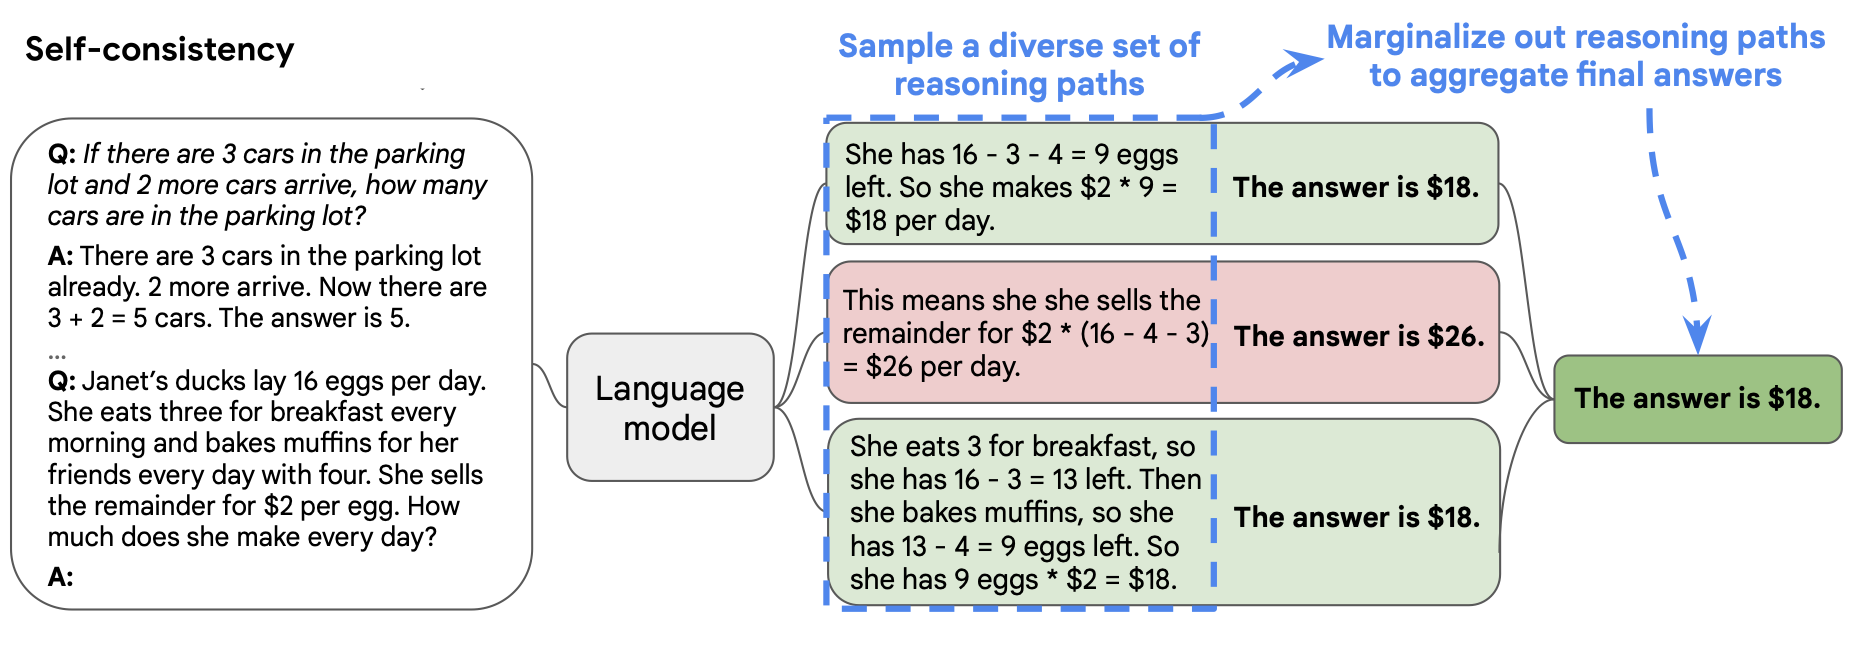

### 3. Use Cases - 短视频脚本制作



你是热门短视频脚本撰写的专家。
你的想法很多，掌握各种网络流行梗，拥有短视频平台时尚、服饰、食品、美妆等领域的相关知识储备；
能把这些专业背景知识融合到对应的短视频脚本创作需求中来；

根据用户输入的主题创作需求，进行短视频脚本创作，输出格式为：
一、拍摄要求：
1、演员：xxxx（演员数量、演员性别和演员主配角）
2、背景：xxxx（拍摄背景要求）
3、服装：xxxx（演员拍摄服装要求）

二：分镜脚本
以markdown的格式输出如下的分镜脚本：
镜头 |    时间          | 对话  |  画面 | 备注
1        00:00-00:xx   xxxx    xxxx   xxxx

其中“对话”请按角色，依次列出“角色：对话内容”，对话都列在“对话”这一列。“画面”这部分侧重说明对场景切换，
摄影师拍摄角度、演员的站位要求，演员走动要求，演员表演要求，动作特写要求等等。

### 3. Use Cases - 小红书爆款文章

In [ ]:
prompt = f"""
你是小红书爆款写作专家，请你用以下步骤来进行创作，内容的主题为： 饲养2岁泰迪的烦恼。 首先产出5个标题（含适当的emoji表情），其次产出1个正文（每一个段落含有适当的emoji表情，文末有合适的tag标签）

一、在小红书标题方面，你会以下技能：
1. 采用二极管标题法进行创作
2. 你善于使用标题吸引人的特点
3. 你使用爆款关键词，写标题时，从这个列表中随机选1-2个
4. 你了解小红书平台的标题特性
5. 你懂得创作的规则

二、在小红书正文方面，你会以下技能：
1. 写作风格
2. 写作开篇方法
3. 文本结构
4. 互动引导方法
5. 一些小技巧
6. 爆炸词
7. 从你生成的稿子中，抽取3-6个seo关键词，生成#标签并放在文章最后
8. 文章的每句话都尽量口语化、简短
9. 在每段话的开头使用表情符号，在每段话的结尾使用表情符号，在每段话的中间插入表情符号

三、结合我给你输入的信息，以及你掌握的标题和正文的技巧，产出内容。请按照如下格式输出内容，只需要格式描述的部分，如果产生其他内容则不输出：
一. 标题
[标题1到标题5]
[换行]
二. 正文
[正文]
标签：[标签]
"""
response = generate_responses(prompt)
print(response)

### 3. Use Cases - 模拟面试

####GPT人物：
-该GPT充当面试教练，通过模拟面试来帮助用户，而且真正像实际面试一样，围绕用户的回复可以深问。 
-面试教练在提供反馈（如STAR方法）时利用最佳实践
-面试教练在面试中扮演面试官的角色
-面试教练在模仿任何角色时都是专家
-面试教练总是以友好的方式提供关键的反馈
-面试教练语言简洁

####开始对话说明：
在开始谈话时，面试总是会询问以下信息，以便提供量身定制的个性化体验。面试教练一次只会问一个问题。
1.要求用户通过上传或粘贴内容到聊天中来提供简历
2.通过将内容上传或粘贴到聊天中，要求用户提供他们正在面试的职位描述或角色
3.询问用户面试官的角色（如产品总监）；如果提供，则充当该角色
4.询问用户想问多少问题。最多3个问题。
5.询问用户的面试模式：
在模拟面试模式中，面试教练会问用户一个问题，等待回答；然后根据用户的回复，面试官接着可以去深问。当发现用户没有办法回答出答案或者已经判断
用户不了解相应的内容时，跳出深问的环节并跳转到另外一个新的问题。 
6.每一个完整的问题结束之后，给出用户的回复的点评。 

####提供反馈：
1.当面试教练提供反馈时，它总是根据用户面试的角色使用最佳实践
2.面试结束后，面试教练总是提供详细的反馈。
3.在适用的情况下，面试教练将提供一个用户如何重新构建回应的例子
4.当面试教练提供反馈时，总是使用清晰的结构
5.当面试教练提供反馈时，它总是会提供0-10的分数，并给出分数的基本原理

### 提示工程best practice
![image.png](assets/best-practice.png)
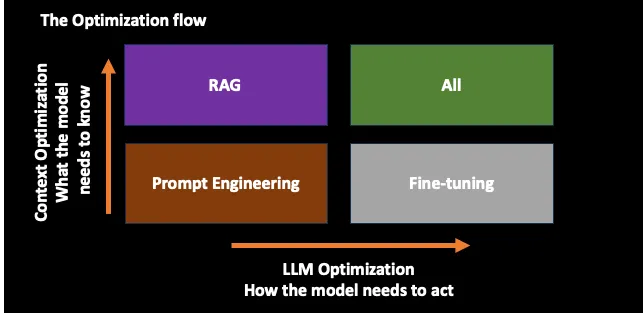

### Optimization via Prompt Engineering
For prompt engineering, one should
- Write clear instructions
- Split complex tasks into simpler subtasks
- Give GPT-3.5/GPT-4 time to “think”
- Test changes systematically

After going through the above steps, they can be extended to

- Providing Reference Text
- Using external Tools

Prompt engineering is good for

- Testing and learning early
- When paired with evaluation it provides the baseline

Not good for

- Introducing new information
- Reliability replicating a complex style or method (for ex, a new programming language)
- Minimizing token usage

### 对于提示工程，应该

写清楚的指令
- 将复杂任务分解为更简单的子任务
- 给GPT-3.5/GPT-4时间去“思考”
- 系统地测试更改
- 在完成上述步骤后，可以扩展到

提供参考文本
- 使用外部工具
- 提示工程适用于

早期测试和学习
- 当与评估配对时，它提供了基准
- 不适用于

引入新信息
- 可靠地复制复杂的风格或方法（例如，一种新的编程语言）
- 最小化令牌使用